In [1]:
# najpierw w konsoli pip install --upgrade huggingface_hub 
# i pip install ipywidgets
from huggingface_hub import hf_hub_download

In [ ]:
# stworzyć konto na hugging face, logowanie przy użyciu utworzonego tokena
from huggingface_hub import login
login()

In [ ]:
# pip install datasets
# pip install Pillow
from datasets import load_dataset

ds = load_dataset("mertcobanov/animals")

Resolving data files:   0%|          | 0/5400 [00:00<?, ?it/s]

In [ ]:
# zamiana na obiekt DataFrame - imo łatwiejsza praca
df = ds['train'].to_pandas()

In [137]:
#90 klas oznaczonych numerami, trzeba ręcznie zamienić
unique_labels = set(df['label'])
print(len(unique_labels))
unique_labels

90


{'antelope',
 'badger',
 'bat',
 'bear',
 'bee',
 'beetle',
 'bison',
 'boar',
 'butterfly',
 'cat',
 'caterpillar',
 'chimpanzee',
 'cockroach',
 'cow',
 'coyote',
 'crab',
 'crow',
 'deer',
 'dog',
 'dolphin',
 'donkey',
 'dragonfly',
 'duck',
 'eagle',
 'elephant',
 'flamingo',
 'fly',
 'fox',
 'goat',
 'goldfish',
 'goose',
 'gorilla',
 'grasshopper',
 'hamster',
 'hare',
 'hedgehog',
 'hippopotamus',
 'hornbill',
 'horse',
 'hummingbird',
 'hyena',
 'jellyfish',
 'kangaroo',
 'koala',
 'ladybugs',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'mosquito',
 'moth',
 'mouse',
 'octopus',
 'okapi',
 'orangutan',
 'otter',
 'owl',
 'ox',
 'oyster',
 'panda',
 'parrot',
 'pelecaniformes',
 'penguin',
 'pig',
 'pigeon',
 'porcupine',
 'possum',
 'raccoon',
 'rat',
 'reindeer',
 'rhinoceros',
 'sandpiper',
 'seahorse',
 'seal',
 'shark',
 'sheep',
 'snake',
 'sparrow',
 'squid',
 'squirrel',
 'starfish',
 'swan',
 'tiger',
 'turkey',
 'turtle',
 'whale',
 'wolf',
 'wombat',
 'woodpecker',


In [ ]:
# słownik mapujący etykiety liczbowe na słowne
name_change = {
0: 'antelope'         ,
1: 'badger'           ,
2: 'bat'              ,
3: 'bear'             ,
4: 'bee'              ,
5: 'beetle'           ,
6: 'bison'            ,
7: 'boar'             ,
8: 'butterfly'        ,
9: 'cat'              ,
10: 'caterpillar'     ,
11: 'chimpanzee'      ,
12: 'cockroach'       ,
13: 'cow'             ,
14: 'coyote'          ,
15: 'crab'            ,
16: 'crow'            ,
17: 'deer'            ,
18: 'dog'             ,
19: 'dolphin'         ,
20: 'donkey'          ,
21: 'dragonfly'       ,
22: 'duck'            ,
23: 'eagle'           ,
24: 'elephant'        ,
25: 'flamingo'        ,
26: 'fly'             ,
27: 'fox'             ,
28: 'goat'            ,
29: 'goldfish'        ,
30: 'goose'           ,
31: 'gorilla'         ,
32: 'grasshopper'     ,
33: 'hamster'         ,
34: 'hare'            ,
35: 'hedgehog'        ,
36: 'hippopotamus'    ,
37: 'hornbill'        ,
38: 'horse'           ,
39: 'hummingbird'     ,
40: 'hyena'           ,
41: 'jellyfish'       ,
42: 'kangaroo'        ,
43: 'koala'           ,
44: 'ladybugs'        ,
45: 'leopard'         ,
46: 'lion'            ,
47: 'lizard'          ,
48: 'lobster'         ,
49: 'mosquito'	      ,
50: 'moth'	          ,
51: 'mouse'           ,
52: 'octopus'	      ,
53: 'okapi'           ,
54: 'orangutan'       ,
55: 'otter'           ,
56: 'owl'             ,
57: 'ox'              ,
58: 'oyster'          ,
59: 'panda'	          ,
60: 'parrot'	      ,
61: 'pelecaniformes',	
62: 'penguin'	      ,
63: 'pig'	          ,
64: 'pigeon'          ,
65: 'porcupine'	      ,
66: 'possum'          ,
67: 'raccoon'	      ,
68: 'rat'	          ,
69: 'reindeer'	      ,
70: 'rhinoceros'      ,
71: 'sandpiper'       ,
72: 'seahorse'        ,
73: 'seal'            ,
74: 'shark'           ,
75: 'sheep'	          ,
76: 'snake'	          ,
77: 'sparrow'	      ,
78: 'squid'	          ,
79: 'squirrel'	      ,
80: 'starfish'        ,
81: 'swan'            ,
82: 'tiger'	          ,
83: 'turkey'          ,
84: 'turtle'          ,
85: 'whale'	          ,
86: 'wolf'            ,
87: 'wombat'	      ,
88: 'woodpecker'	  ,
89: 'zebra'           ,
}

In [127]:
df['label'] = df['label'].map(name_change)
df

,image,label
0,"{'bytes': None, 'path': 'C:\Users\awjur\.cache...",antelope
1,"{'bytes': None, 'path': 'C:\Users\awjur\.cache...",antelope
2,"{'bytes': None, 'path': 'C:\Users\awjur\.cache...",antelope
3,"{'bytes': None, 'path': 'C:\Users\awjur\.cache...",antelope
4,"{'bytes': None, 'path': 'C:\Users\awjur\.cache...",antelope
...,...,...
5395,"{'bytes': None, 'path': 'C:\Users\awjur\.cache...",zebra
5396,"{'bytes': None, 'path': 'C:\Users\awjur\.cache...",zebra
5397,"{'bytes': None, 'path': 'C:\Users\awjur\.cache...",zebra
5398,"{'bytes': None, 'path': 'C:\Users\awjur\.cache...",zebra


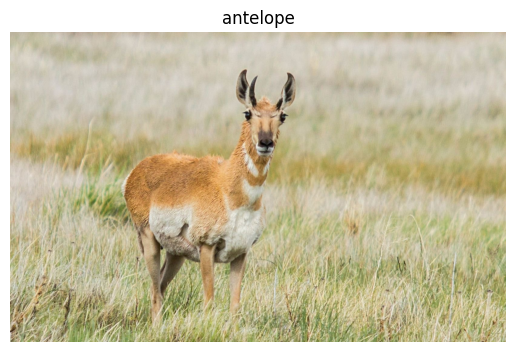

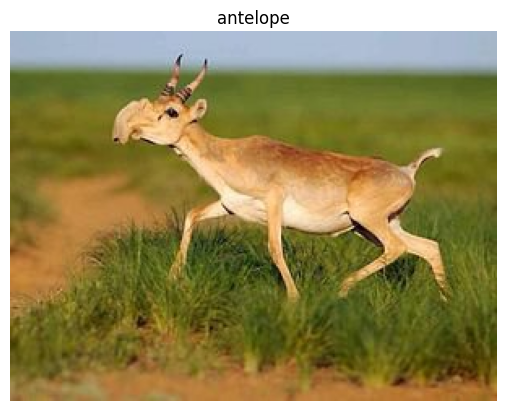

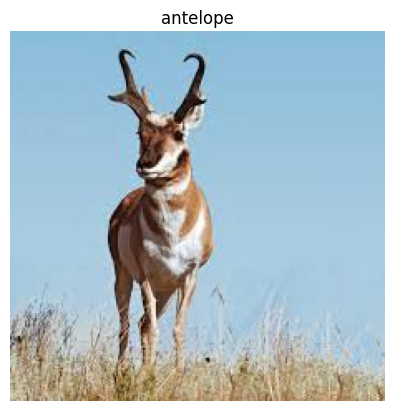

In [ ]:
#podgląd kilku przykładowych zdj.
import matplotlib.pyplot as plt
from datasets import load_dataset

x = 3
imgs = df['image'][:x]
labels = df['label'][:x]

for i, img_info in enumerate(imgs):
    image_path = img_info['path']
    image = Image.open(image_path)
    plt.figure()
    plt.imshow(image)
    plt.title(labels[i])
    plt.axis('off')
    plt.show()